In this project, first we are going to implement a basic sentimental analysis using NLTK and then a more complex analysis using pretrained model BERT for a bunch of Amazon Food Reviews

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk, datetime, re, warnings



warnings.filterwarnings("ignore")

In [100]:
# Download necessary files for the project
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...


True

In [90]:
# Read and little EDA for the reviews
df = pd.read_csv('reviews.csv')

# Check the head of the data
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<Axes: title={'center': 'Score Distribution'}, xlabel='Score'>

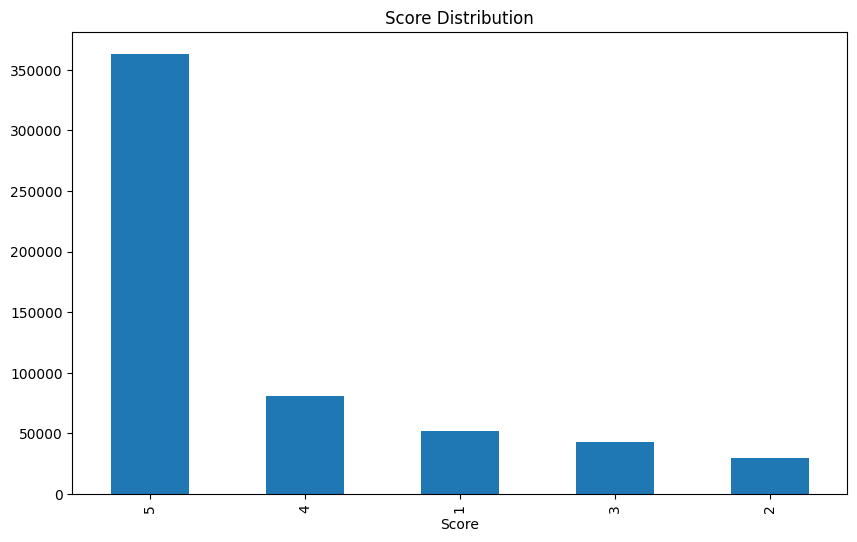

In [77]:
df['Score'].value_counts().plot(kind='bar', figsize=(10, 6), title='Score Distribution')

In [78]:
# Convert Unix timestamp to more readable date
df['New_Time'] = [datetime.datetime.utcfromtimestamp(x) for x in df['Time']]

In [79]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,New_Time
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21


In [81]:
df['Day week'] = df['New_Time'].dt.day_of_week
df['Year'] = df['New_Time'].dt.year
df['Month'] = df['New_Time'].dt.strftime('%B')

Text(0.5, 1.0, 'Day week Distribution')

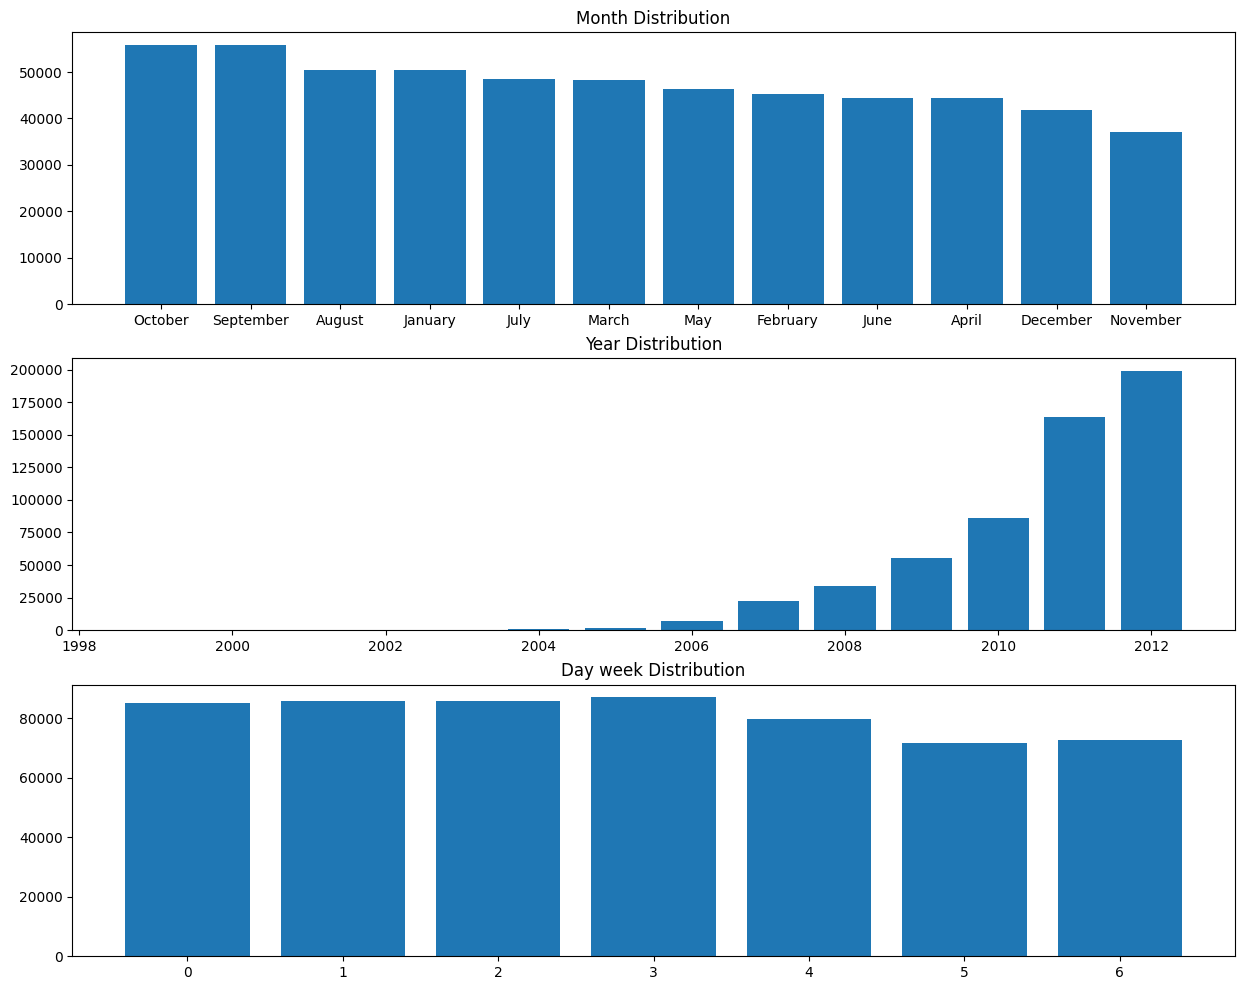

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

ax1.bar(df['Month'].value_counts().index, df['Month'].value_counts().values)
ax1.set_title('Month Distribution')
ax2.bar(df['Year'].value_counts().index, df['Year'].value_counts().values)
ax2.set_title('Year Distribution')
ax3.bar(df['Day week'].value_counts().index, df['Day week'].value_counts().values)
ax3.set_title('Day week Distribution')

Basic NLTK and NLP demostration

In [83]:
# For demostration and learning purposes we are going to work with just 100 reviews
#df = df.head(1001)

In [84]:
example_text = df['Text'][100]
example_text

'The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.'

In [94]:
# Clean up a little the text
cleaned_str = re.sub(r'[^A-Za-z\s]', '', example_text)
cleaned_str = re.sub(r'\s+', ' ', cleaned_str).strip()  # Remove extra spaces and trim
cleaned_str

'The mouth says How do I love thee let me count the waysbr If you like apple products a must have item The only draw back shipping cost These are very heavy'

In [95]:
tokenizer = nltk.word_tokenize(cleaned_str, preserve_line=True)
print(tokenizer)

['The', 'mouth', 'says', 'How', 'do', 'I', 'love', 'thee', 'let', 'me', 'count', 'the', 'waysbr', 'If', 'you', 'like', 'apple', 'products', 'a', 'must', 'have', 'item', 'The', 'only', 'draw', 'back', 'shipping', 'cost', 'These', 'are', 'very', 'heavy']


In [91]:
clean = []
for i in df['Text']:
    text_clean = re.sub(r'[^A-Za-z\s]', '', i)
    text_clean = re.sub(r'\s+', ' ', text_clean).strip()
    clean.append(text_clean)

df['clean_text'] = clean

In [92]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,clean_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price There was a wide ...


In [98]:
# Tag the words in a all phrase to improve the analysis using the averaged_perceptron_tagger model in NLTK
nltk.pos_tag(tokenizer)

[('The', 'DT'),
 ('mouth', 'NN'),
 ('says', 'VBZ'),
 ('How', 'WRB'),
 ('do', 'VB'),
 ('I', 'PRP'),
 ('love', 'VB'),
 ('thee', 'NN'),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('count', 'VB'),
 ('the', 'DT'),
 ('waysbr', 'NN'),
 ('If', 'IN'),
 ('you', 'PRP'),
 ('like', 'VBP'),
 ('apple', 'NN'),
 ('products', 'NNS'),
 ('a', 'DT'),
 ('must', 'MD'),
 ('have', 'VB'),
 ('item', 'NN'),
 ('The', 'DT'),
 ('only', 'JJ'),
 ('draw', 'NN'),
 ('back', 'RB'),
 ('shipping', 'VBG'),
 ('cost', 'NN'),
 ('These', 'DT'),
 ('are', 'VBP'),
 ('very', 'RB'),
 ('heavy', 'JJ')]

In [101]:
# 1 Model - VADER Sentiment Scoring Model
from nltk.sentiment.vader import SentimentIntensityAnalyzer

model = SentimentIntensityAnalyzer()

In [102]:
model.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [103]:
model.polarity_scores('This is so bad!')

{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.6988}

This model assign a negative, neutral and positive for each word to get a compound, more positive value (max 1) is a positive sentiment and more negative value (max -1) is negative sentiment

In [112]:
df = df.head(1000) # Since this is for learning purposes, we limit the number of rows to 1000

In [113]:
# Do the sentiment analysis for all the text
results ={}
for i, row in df.iterrows():
    results[row.Id] = model.polarity_scores(row.clean_text)

In [120]:
sentiment_results = pd.DataFrame(results).T.reset_index().rename(columns={'index':'Id'})
df_results = pd.merge(df, sentiment_results, on='Id')
df_results.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,clean_text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,0.000,0.925,0.075,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price There was a wide ...,0.000,0.552,0.448,0.9468


Text(0.5, 1.0, 'Compound Score by Sentiment Score')

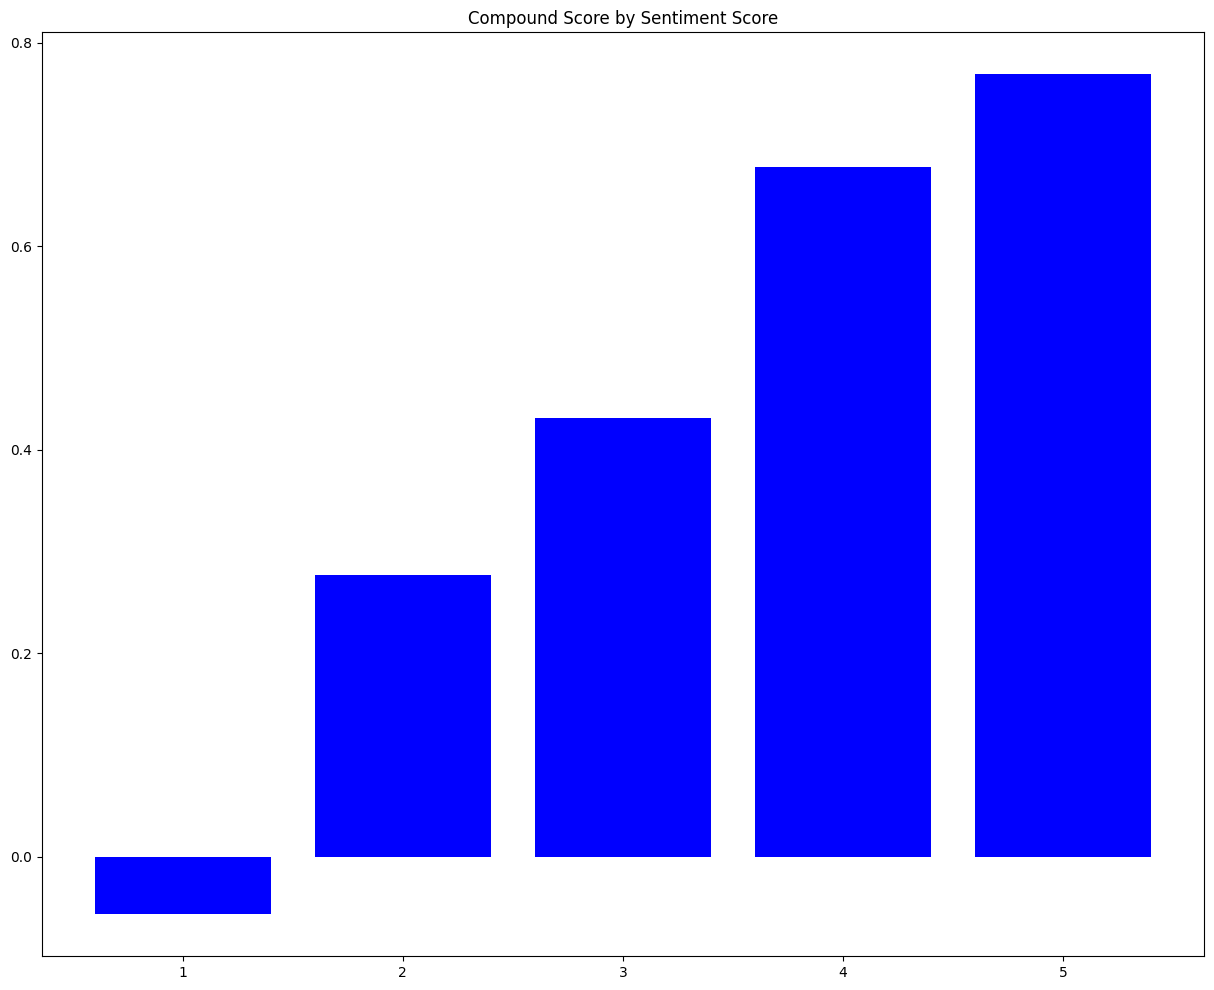

In [149]:
x = list(df_results[['Score', 'compound']].groupby('Score').mean().index)
y = list(df_results[['Score', 'compound']].groupby('Score').mean()['compound'].values)
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 12))

ax1.bar(x, y, color='blue')
ax1.set_title('Compound Score by Sentiment Score')